# Pertemuan 5 (OpenCV Facerecognition)

- Install library (OpenCV Contrib)

In [1]:
! pip install opencv-contrib-python

- Install library Scikit-Learn

In [2]:
! pip install scikit-learn

- Install Itertools

In [1]:
! pip install more-itertools

- Import library

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

___

## OpenCV Face recognition techniques
    - Eigen Faces
    - Fisher Faces
    - Local Binary Pattern Histograms (LBPH)
    
- source : https://github.com/opencv/opencv_contrib/tree/master/modules/face

## Face Recognition
> *Face recognition is all about **extracting those meaningful features** from an image, putting them into a **useful representation** and performing some kind of **classification** on them.*

### 1. Eigenface
- The problem with the image representation we are given is its **high dimensionality**. 
- Two-dimensional $h×w$ grayscale images span a $m=hw$-dimensional vector space, so an image with $100×100$ pixels lies in a $10,000$-dimensional image space already.

> *Are all dimensions equally useful for us?*
- The eigenface approach began with a search for a **low-dimensional representation of face images**. <br>
<img src="resource/eigenface.png" style="width:500px"></img>
- A set of eigenfaces can be generated by performing a mathematical process called **principal component analysis (PCA)** on a large set of images depicting different human faces. <br>
<img src="resource/pca.png" style="width:500px"></img>
- Dimensionality reduction by eigenface : <br>
<img src="resource/pca_2.png" style="width:500px"></img>

- source : https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html

### 2. Fisherface
- The **PCA** finds a linear combination of features that maximizes the total variance in data. 
- While this is clearly a powerful way to **represent data**, it doesn't consider any classes and so a lot of **discriminative information** may be **lost** when throwing some components away. 
- This can yield bad results, especially when it comes to **classification**. 
- In order to find a combination of features that separates best between classes the **Linear Discriminant Analysis** instead using PCA.
- source : https://www.bytefish.de/blog/fisherfaces.html#introduction


### 3. Local Binary Pattern Histograms (LBPH)
- Local binary patterns (LBP) is a type of visual descriptor used for classification in computer vision
- It has since been found to be a **powerful feature for texture classification**.
- The basic idea for developing the LBP operator was that two-dimensional surface textures can be described by two complementary measures: **local spatial patterns** and **gray scale contrast**. <br>
<img src="resource/lbph.gif" style="width:500px"></img>

___
## OpenCV Implementation

#### prepare dataset

In [75]:
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [76]:
dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: # limit only 70 face per class
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            images.append(img)
            names.append(folder)

In [77]:
labels = np.unique(names)

labels

array(['Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Tony_Blair', 'Yunus'], dtype='<U17')

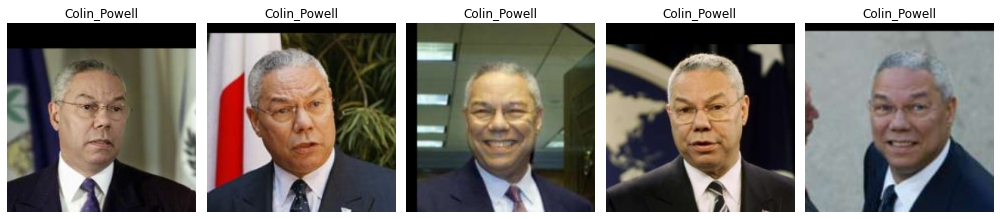

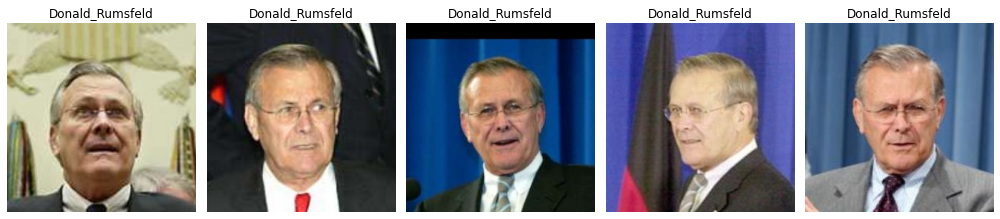

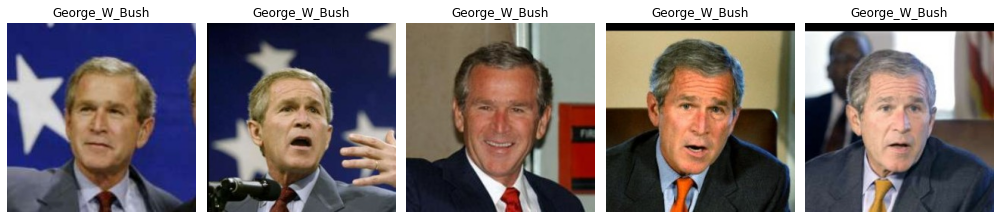

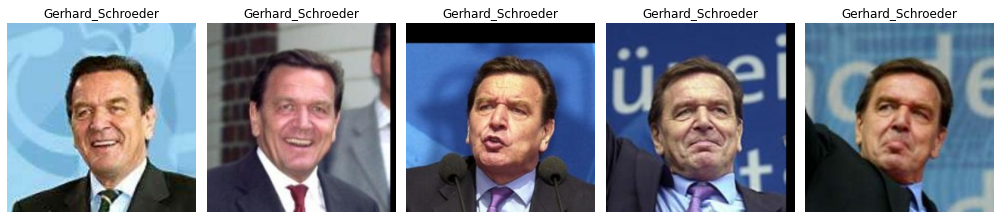

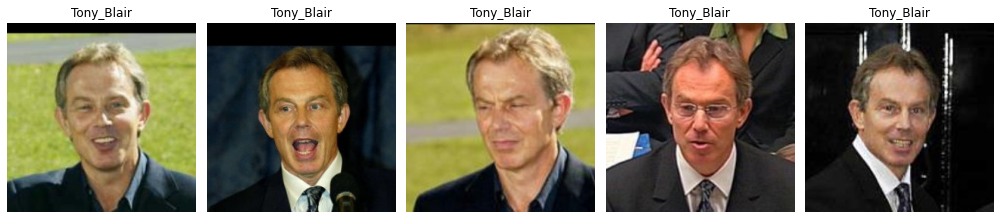

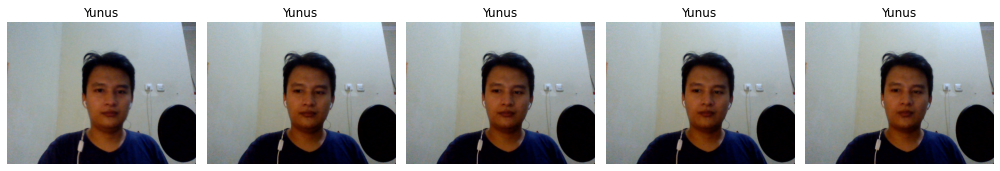

In [78]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

- crop, resize & convert to grayscale for detected face area using **cascade classifier**

In [79]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [80]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [81]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]

Face not found in image index 68
Face not found in image index 170


In [82]:
len(croped_images)

413

In [83]:
len(names)

413

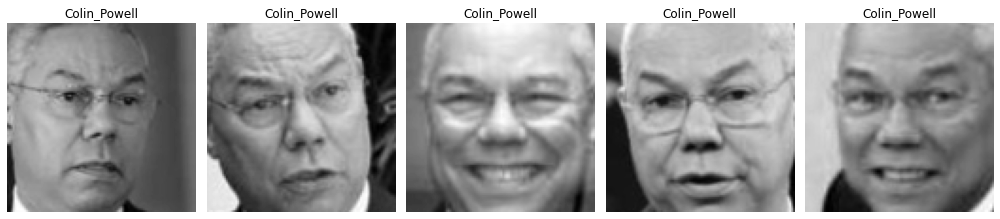

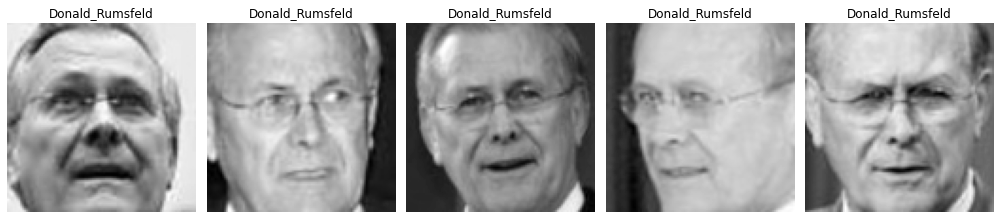

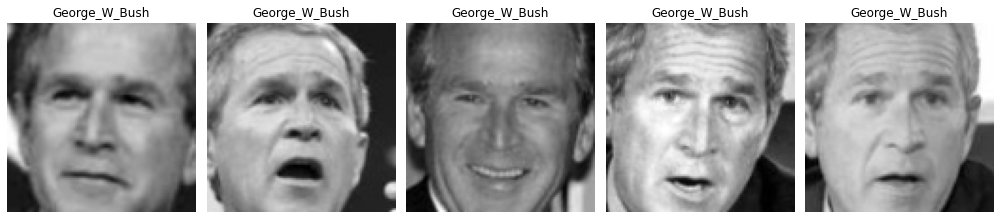

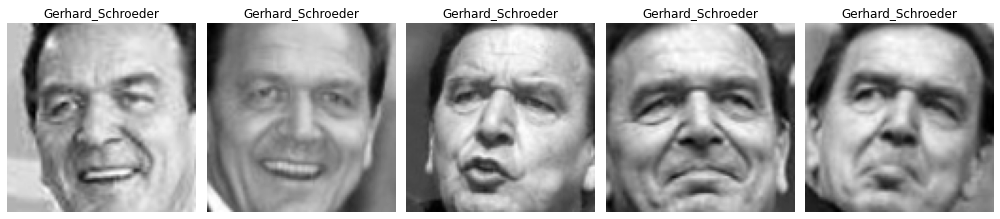

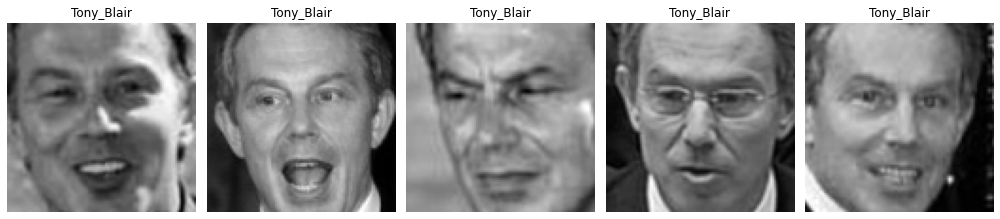

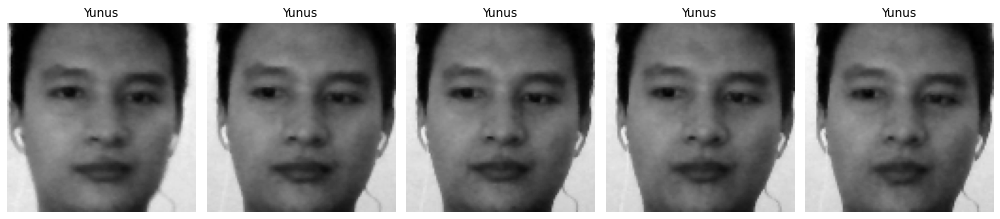

In [84]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

- encoding names

In [85]:
names

['Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell

In [86]:
print(labels)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair' 'Yunus']


In [87]:
np.where("Colin_Powell" == labels)

(array([0], dtype=int64),)

In [88]:
name_vec = np.array([np.where(name == labels)[0][0] for name in names])

In [89]:
print(name_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5]


#### Create Model Facerecognition
- Eigen Faces
- Fisher Faces
- Local Binary Pattern Histograms (LBPH)

In [90]:
#model = cv2.face.EigenFaceRecognizer_create()
#model = cv2.face.FisherFaceRecognizer_create()
model = cv2.face.LBPHFaceRecognizer_create()

In [91]:
model.train(croped_images, name_vec)

- save & load model

In [92]:
model.save("lbph_model.yml")

In [93]:
model.read("lbph_model.yml")

- Test Model

Found:  Donald_Rumsfeld
Confidence:  0.0


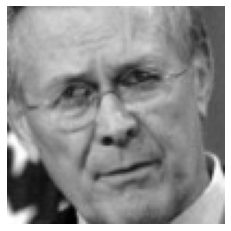

In [94]:
path = "test/Donald_Rumsfeld_0064.jpg"
 
img = cv2.imread(path)
img = detect_face(img, 0)

idx, confidence = model.predict(img)
 
print("Found: ", labels[idx])
print("Confidence: ", confidence)

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis(False)
plt.show()

- Apply to all Test dataset

Actual 	:  Colin_Powell_0115.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


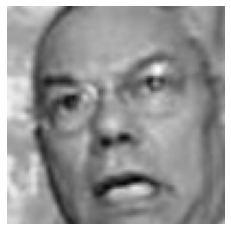

Actual 	:  Colin_Powell_0116.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


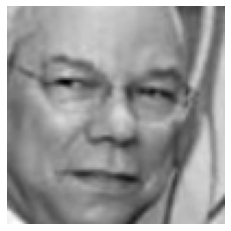

Actual 	:  Colin_Powell_0117.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


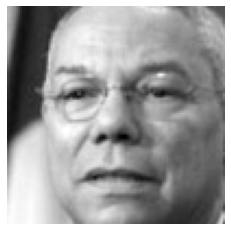

Actual 	:  Colin_Powell_0118.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


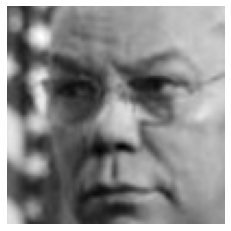

Actual 	:  Colin_Powell_0119.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


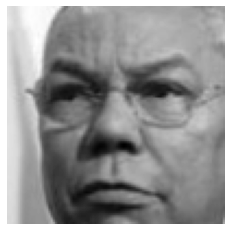

Actual 	:  Donald_Rumsfeld_0017.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


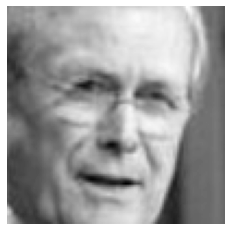

Actual 	:  Donald_Rumsfeld_0064.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


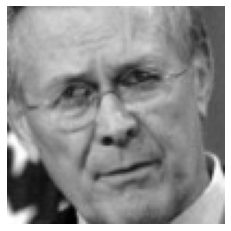

Actual 	:  Donald_Rumsfeld_0090.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


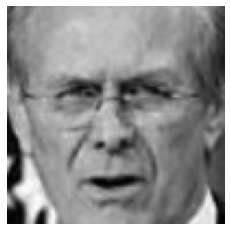

Actual 	:  Donald_Rumsfeld_0097.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


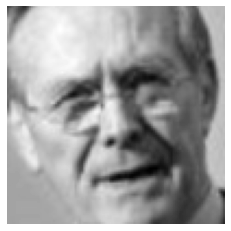

Actual 	:  Donald_Rumsfeld_0105.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  83.14840674910977


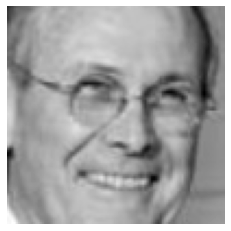

Actual 	:  George_W_Bush_0194.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.23153573987372


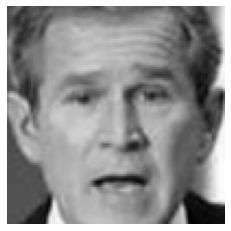

Actual 	:  George_W_Bush_0195.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.26353234476271


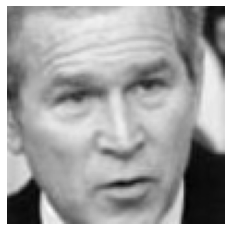

Actual 	:  George_W_Bush_0197.jpg
Predic 	:  George_W_Bush
Confidence 	:  83.24428685471469


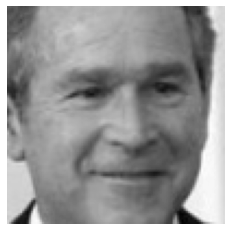

Actual 	:  George_W_Bush_0207.jpg
Predic 	:  George_W_Bush
Confidence 	:  69.25756609195612


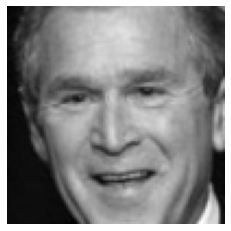

Actual 	:  George_W_Bush_0209.jpg
Predic 	:  George_W_Bush
Confidence 	:  67.4571943392215


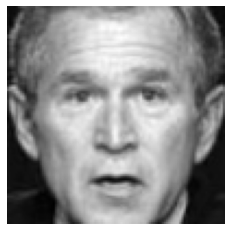

Actual 	:  Gerhard_Schroeder_0081.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


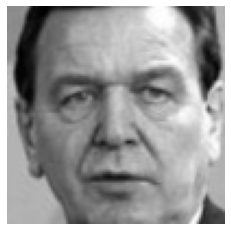

Actual 	:  Gerhard_Schroeder_0084.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


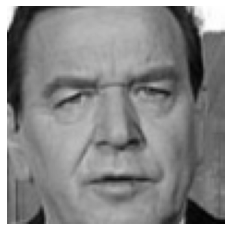

Actual 	:  Gerhard_Schroeder_0091.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


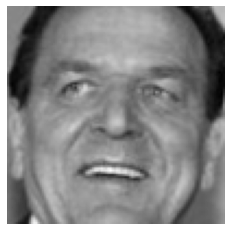

Actual 	:  Gerhard_Schroeder_0097.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


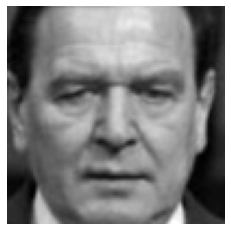

Actual 	:  Gerhard_Schroeder_0099.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


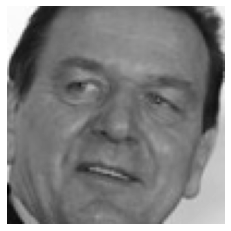

Actual 	:  Tony_Blair_0121.jpg
Predic 	:  Tony_Blair
Confidence 	:  82.91633963787804


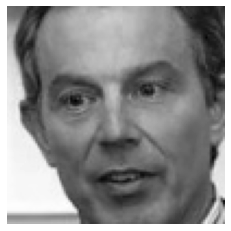

Actual 	:  Tony_Blair_0122.jpg
Predic 	:  Tony_Blair
Confidence 	:  85.77388718205535


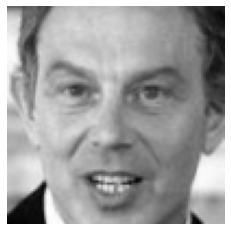

Actual 	:  Tony_Blair_0124.jpg
Predic 	:  Tony_Blair
Confidence 	:  81.37008612454139


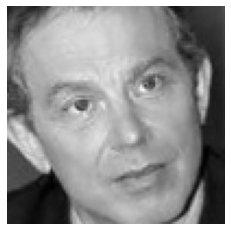

Actual 	:  Tony_Blair_0130.jpg
Predic 	:  Tony_Blair
Confidence 	:  77.35402989381915


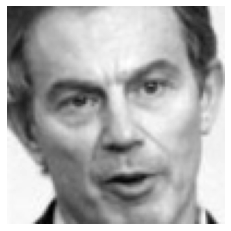

Actual 	:  Tony_Blair_0142.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  94.55138982501609


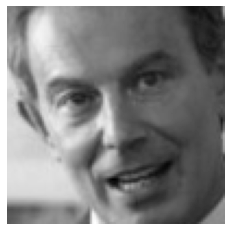

Actual 	:  Yunus_0025.jpg
Predic 	:  Yunus
Confidence 	:  0.0


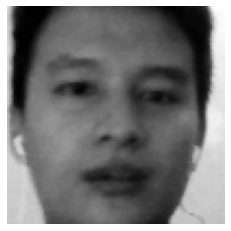

Actual 	:  Yunus_0030.jpg
Predic 	:  Yunus
Confidence 	:  0.0


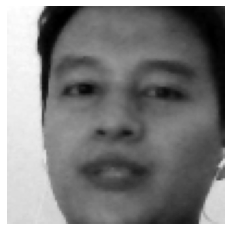

Actual 	:  Yunus_0032.jpg
Predic 	:  Yunus
Confidence 	:  0.0


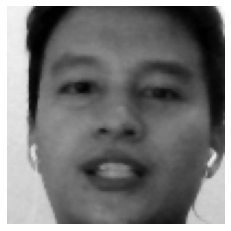

Actual 	:  Yunus_0044.jpg
Predic 	:  Yunus
Confidence 	:  0.0


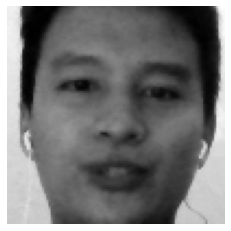

Actual 	:  Yunus_0047.jpg
Predic 	:  Yunus
Confidence 	:  0.0


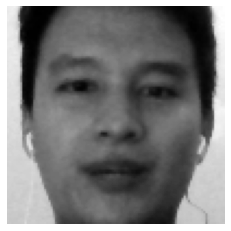

In [95]:
test_folder = "test/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        img = cv2.imread(path)
        img = detect_face(img, 0)

        idx, confidence = model.predict(img)
        
        actual_names.append(np.where(filename[:-9] == labels)[0][0]) #get label from filename (remove 9 last char)
        predicted_names.append(idx)
        confidences.append(confidence)
        
        print("Actual \t: ", filename)
        print("Predic \t: ", labels[idx])
        print("Confidence \t: ", confidence)

        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis(False)
        plt.show()

- Result summary

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

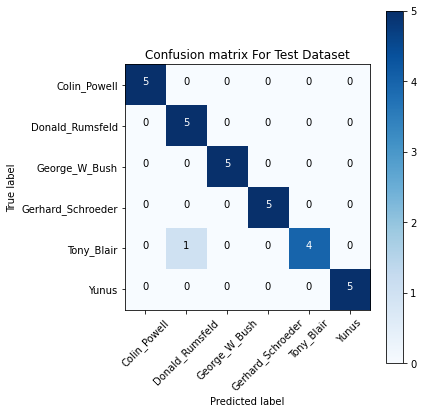

In [98]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_names, predicted_names)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For Test Dataset')

In [99]:
from sklearn.metrics import classification_report

In [100]:
print("== Classification Report for Test Dataset ==\n")
print(classification_report(actual_names, 
                            predicted_names, 
                            target_names=labels))

== Classification Report for Test Dataset ==

                   precision    recall  f1-score   support

     Colin_Powell       1.00      1.00      1.00         5
  Donald_Rumsfeld       0.83      1.00      0.91         5
    George_W_Bush       1.00      1.00      1.00         5
Gerhard_Schroeder       1.00      1.00      1.00         5
       Tony_Blair       1.00      0.80      0.89         5
            Yunus       1.00      1.00      1.00         5

         accuracy                           0.97        30
        macro avg       0.97      0.97      0.97        30
     weighted avg       0.97      0.97      0.97        30



![](resource/prec_rec_2.png)

___
#### Add Our Face to Dataset

- Create datset for our face 

In [70]:
cap = cv2.VideoCapture(0)

my_name = "Yunus"
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret :
        cv2.imshow("Capture Photo", frame)
        cv2.imwrite("my_face/%s_%04d.jpg" %  (my_name, i), frame)
        
        if cv2.waitKey(100) == ord('q') or i == 71:
            break
        i += 1    
cap.release()
cv2.destroyAllWindows()

In [73]:
! Dir dataset\

 Volume in drive C has no label.
 Volume Serial Number is 6622-681D

 Directory of C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\dataset

12/16/2020  08:52 PM    <DIR>          .
12/16/2020  08:52 PM    <DIR>          ..
12/16/2020  08:02 PM    <DIR>          Colin_Powell
12/16/2020  08:02 PM    <DIR>          Donald_Rumsfeld
12/16/2020  08:02 PM    <DIR>          George_W_Bush
12/16/2020  08:02 PM    <DIR>          Gerhard_Schroeder
12/16/2020  08:02 PM    <DIR>          Tony_Blair
12/16/2020  08:52 PM    <DIR>          Yunus
               0 File(s)              0 bytes
               8 Dir(s)  258,253,017,088 bytes free


In [72]:
! mkdir dataset\Yunus

In [74]:
! move my_face\* dataset\Yunus

C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0000.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0001.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0002.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0003.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0004.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0005.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0006.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0007.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_face\Yunus_0008.jpg
C:\Users\yunus\Documents\GitHub\Materi-Training\C. Facerecognition\pertemuan_5\my_

- Copy 5 file manualy from folder `dataset/<Your Name>` to `test/`

- Rerun Load dataset, Traing & Test Model

#### Test realtime video

In [103]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [104]:
cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))
            
            idx, confidence = model.predict(face_img)
            label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()